## Text Analysis on 800-53 Mapping

### Word Frequency

Sources:

https://practicaldatascience.co.uk/machine-learning/how-to-preprocess-text-for-nlp-in-four-easy-steps
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

In [1]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from operator import itemgetter
nlp = spacy.load('en_core_web_sm')

In [2]:
data = pd.read_csv("800-53 Mapping Mar 9.csv")
data.head()

,Identity,Device,Network/Environment,Application Workload,Data,ZT Control Family,Primary Function,Secondary Function,ZT Control Function,ZT Control Maturity Rating,Comments,Control Identifier,Control (or Control Enhancement) Name,Control Text,Discussion,Related Controls
0,NaN,NaN,0,0,0,Multiple,NaN,NaN,Governance,Traditional,AC policies can relate to multiple pillars - i...,AC-1,Policy and Procedures,"a. Develop, document, and disseminate to [Assi...",Access control policy and procedures address t...,"IA-1, PM-9, PM-24, PS-8, SI-12 ."
1,1.0,0.0,0,0,0,Identity,NaN,NaN,All,Traditional,NaN,AC-2,Account Management,a. Define and document the types of accounts a...,Examples of system account types include indiv...,"AC-3, AC-5, AC-6, AC-17, AC-18, AC-20, AC-24, ..."
2,1.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Optimal,NaN,AC-2(1),Account Management | Automated System Account ...,Support the management of system accounts usin...,Automated system account management includes u...,None.
3,0.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Advanced,NaN,AC-2(2),Account Management | Automated Temporary and E...,Automatically [Selection: remove; disable] tem...,Management of temporary and emergency accounts...,None.
4,0.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Traditional,NaN,AC-2(3),Account Management | Disable Accounts,Disable accounts within [Assignment: organizat...,"Disabling expired, inactive, or otherwise anom...",None.


In [3]:
# Create control text dataframe for each pillar
identity_df = data.loc[data['Identity '] == 1][["Control Text"]] # remove the space after 'Identity' for new data
device_df = data.loc[data['Device'] == 1][["Control Text"]] 
net_env_df = data.loc[data['Network/Environment'] == 1][["Control Text"]]
app_workload_df = data.loc[data['Application Workload'] == 1][["Control Text"]]
data_df = data.loc[data['Data'] == 1][["Control Text"]]

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Claire\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Claire\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Claire\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
def tokenize(column):
    """
    Tokenizes a Pandas dataframe column and returns a list of tokens.
    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    

In [6]:
def remove_stopwords(tokenized_column):
    """
    Return a list of tokens with English stopwords removed. 
    """
    stops = set(stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]

In [7]:
def apply_stemming(tokenized_column):
    """
    Return a list of tokens with Porter stemming applied.
    """

    stemmer = PorterStemmer() 
    return [stemmer.stem(word) for word in tokenized_column]

In [8]:
def lemmatizer(tokenized_column):
    '''
    Return a list of tokens with lemmatizer applied.
    '''
    wordnet_lemmatizer = WordNetLemmatizer()
    return [wordnet_lemmatizer.lemmatize(word) for word in tokenized_column]

In [9]:
def rejoin_words(tokenized_column):
    """Rejoins a tokenized word list into a single string. 
    
    Args:
        tokenized_column (list): Tokenized column of words. 
        
    Returns:
        string: Single string of untokenized words. 
    """
    
    return (" ".join(tokenized_column))

#### Identity

In [10]:
identity_df['Control Text']= identity_df['Control Text'].apply(lambda x: x.lower())
identity_df['tokenized'] = identity_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
identity_df['stopwords_removed'] = identity_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
identity_df['porter_stemmed'] = identity_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
identity_df['msg_lemmatized'] = identity_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
identity_df['rejoined_stem'] = identity_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
identity_df['rejoined_lem'] = identity_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [11]:
with open('identity_text.txt', 'w') as f:
    f.write(identity_df['rejoined_lem'].str.cat())

In [12]:
identity_text = open('identity_text.txt', encoding="utf8").read()

In [13]:
parsed_identity_text = nlp(identity_text)

In [73]:
identity_histogram = Counter()
for token in parsed_identity_text:
    original_token_text = token.orth_
    identity_histogram[original_token_text] += 1

del identity_histogram['b']
del identity_histogram['one']

identity_sorted_token_count_pairs = sorted(identity_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in identity_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 136
system : 58
access : 54
individual : 47
policy : 37
information : 37
account : 31
security : 28
role : 27
user : 26
authenticator : 26
personnel : 25
processing : 21
following : 20
organizational : 20
control : 19
personally : 18
identifiable : 18
frequency : 17
selection : 17
authentication : 17
procedure : 16
time : 15
subject : 15
mechanism : 15
external : 14
identity : 14
use : 13
password : 13
document : 12
attribute : 12
change : 12
object : 12
device : 12
service : 12
authorization : 11
period : 11
identifier : 11
group : 10
management : 10
process : 10
within : 9
update : 9
require : 8
authorized : 8
privilege : 8
requirement : 8
using : 8
associated : 8
purpose : 8
based : 7
review : 7
compliance : 7
audit : 7
manage : 7
organization : 7
applicable : 7
assessment : 7
monitoring : 7
prior : 7
risk : 7
identification : 7
verify : 7
credential : 7
notify : 6
changing : 6
automated : 6
specified : 6
component : 6
privacy : 6
agreement : 6
standard : 6
guideline : 

Text(0.5, 1.0, 'Identity')

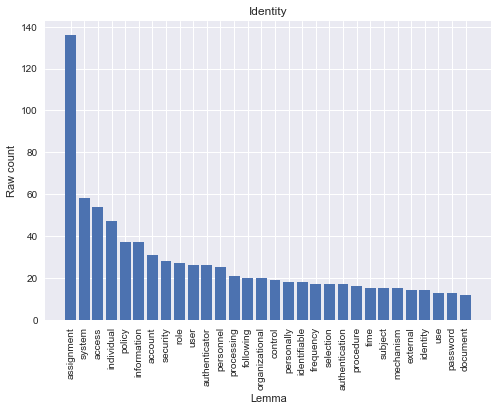

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in identity_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in identity_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts)
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Identity")

#### Device

In [16]:
device_df['Control Text']= device_df['Control Text'].apply(lambda x: x.lower())
device_df['tokenized'] = device_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
device_df['stopwords_removed'] = device_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
device_df['porter_stemmed'] = device_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
device_df['msg_lemmatized'] = device_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
device_df['rejoined_stem'] = device_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
device_df['rejoined_lem'] = device_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [17]:
with open('device_text.txt', 'w') as f:
    f.write(device_df['rejoined_lem'].str.cat())

In [75]:
device_text = open('device_text.txt', encoding="utf8").read()
parsed_device_text = nlp(device_text)

device_histogram = Counter()
for token in parsed_device_text:
    original_token_text = token.orth_
    device_histogram[original_token_text] += 1
    
del device_histogram['b']
del device_histogram['c']
del device_histogram['one']

device_sorted_token_count_pairs = sorted(device_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in device_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 79
system : 57
access : 30
device : 28
change : 22
policy : 18
information : 17
component : 17
subject : 16
control : 15
security : 15
following : 14
remote : 13
selection : 12
object : 11
mobile : 11
use : 10
configuration : 10
automated : 9
using : 9
frequency : 9
physical : 9
monitoring : 8
attribute : 7
mechanism : 7
unclassified : 7
audit : 7
assessment : 7
authentication : 6
authorized : 6
connection : 6
classified : 6
review : 6
unauthorized : 5
network : 5
document : 5
organizational : 5
facility : 5
official : 5
external : 5
accountability : 5
lease : 5
service : 5
support : 5
specified : 4
within : 4
associated : 4
based : 4
requirement : 4
number : 4
logon : 4
factor : 4
time : 4
approval : 4
update : 4
current : 4
vulnerability : 4
risk : 4
baseline : 4
response : 4
provide : 4
supply : 4
enforce : 3
covered : 3
specifies : 3
granted : 3
privilege : 3
rule : 3
governing : 3
consecutive : 3
attempt : 3
user : 3
monitor : 3
implementation : 3
containing : 3
autho

Text(0.5, 1.0, 'Device')

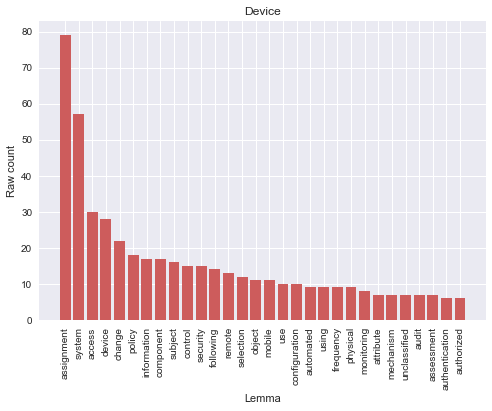

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in device_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in device_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts, color='indianred')
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Device")

#### Network/Environment

In [20]:
net_env_df['Control Text']= net_env_df['Control Text'].apply(lambda x: x.lower())
net_env_df['tokenized'] = net_env_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
net_env_df['stopwords_removed'] = net_env_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
net_env_df['porter_stemmed'] = net_env_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
net_env_df['msg_lemmatized'] = net_env_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
net_env_df['rejoined_stem'] = net_env_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
net_env_df['rejoined_lem'] = net_env_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [21]:
with open('net_env_text.txt', 'w') as f:
    f.write(net_env_df['rejoined_lem'].str.cat())

In [77]:
net_env_text = open('net_env_text.txt', encoding="utf8").read()
parsed_net_env_text = nlp(net_env_text)

net_env_histogram = Counter()
for token in parsed_net_env_text:
    original_token_text = token.orth_
    net_env_histogram[original_token_text] += 1

del net_env_histogram['b']
del net_env_histogram['one']

net_env_sorted_token_count_pairs = sorted(net_env_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in net_env_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 179
system : 152
information : 54
component : 45
control : 43
following : 37
security : 30
access : 28
selection : 26
change : 25
policy : 24
external : 23
type : 20
frequency : 20
monitoring : 20
mechanism : 19
device : 19
using : 18
event : 17
cryptographic : 17
network : 16
subject : 15
automated : 15
unauthorized : 14
use : 14
within : 13
time : 13
mobile : 13
assessment : 13
audit : 12
organizational : 12
service : 12
object : 11
processing : 11
communication : 11
connection : 11
official : 11
accordance : 11
traffic : 11
attribute : 10
configuration : 10
wireless : 10
individual : 10
internal : 10
storage : 10
support : 10
function : 10
action : 10
software : 10
source : 10
key : 10
flow : 9
remote : 9
unclassified : 9
authorizing : 9
interface : 9
identified : 9
vulnerability : 9
physical : 9
rule : 8
c : 8
capability : 8
document : 8
prior : 8
user : 8
authorized : 8
data : 8
managed : 8
exception : 8
protection : 8
classified : 7
review : 7
identify : 7
update : 7

Text(0.5, 1.0, 'Network/Environment')

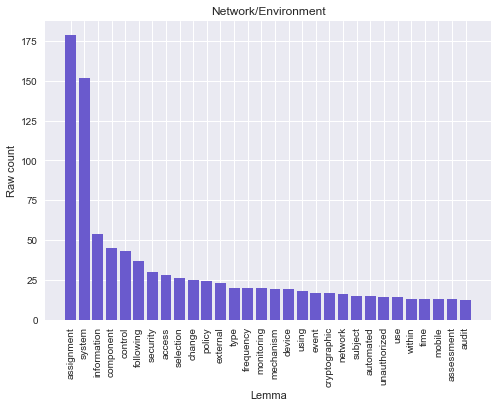

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in net_env_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in net_env_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts, color='slateblue')
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Network/Environment")

#### Application Workload

In [24]:
app_workload_df['Control Text']= app_workload_df['Control Text'].apply(lambda x: x.lower())
app_workload_df['tokenized'] = app_workload_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
app_workload_df['stopwords_removed'] = app_workload_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
app_workload_df['porter_stemmed'] = app_workload_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
app_workload_df['msg_lemmatized'] = app_workload_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
app_workload_df['rejoined_stem'] = app_workload_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
app_workload_df['rejoined_lem'] = app_workload_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [25]:
with open('app_workload_text.txt', 'w') as f:
    f.write(app_workload_df['rejoined_lem'].str.cat())

In [79]:
app_workload_text = open('app_workload_text.txt', encoding="utf8").read()
parsed_app_workload_text = nlp(app_workload_text)

app_workload_histogram = Counter()
for token in parsed_app_workload_text:
    original_token_text = token.orth_
    app_workload_histogram[original_token_text] += 1

del app_workload_histogram['b']
del app_workload_histogram['c']
del app_workload_histogram['one']

app_workload_sorted_token_count_pairs = sorted(app_workload_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in app_workload_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 59
system : 58
change : 22
component : 21
policy : 18
control : 17
access : 16
information : 15
security : 15
subject : 14
object : 11
following : 11
automated : 11
using : 9
configuration : 9
frequency : 8
attribute : 7
assessment : 7
monitoring : 7
privacy : 6
audit : 6
baseline : 6
specified : 5
unauthorized : 5
authorized : 5
external : 5
organizational : 5
document : 5
accountability : 5
internal : 5
approval : 5
software : 5
service : 5
privilege : 4
associated : 4
limited : 4
use : 4
approved : 4
connection : 4
personnel : 4
role : 4
selection : 4
compliance : 4
update : 4
vulnerability : 4
risk : 4
prior : 4
environment : 4
code : 4
source : 4
supply : 4
authorization : 3
covered : 3
across : 3
specifies : 3
granted : 3
rule : 3
governing : 3
authentication : 3
individual : 3
process : 3
implementation : 3
storage : 3
procedure : 3
development : 3
review : 3
current : 3
part : 3
accuracy : 3
currency : 3
availability : 3
requirement : 3
mechanism : 3
proposed : 3
p

Text(0.5, 1.0, 'Application Workload')

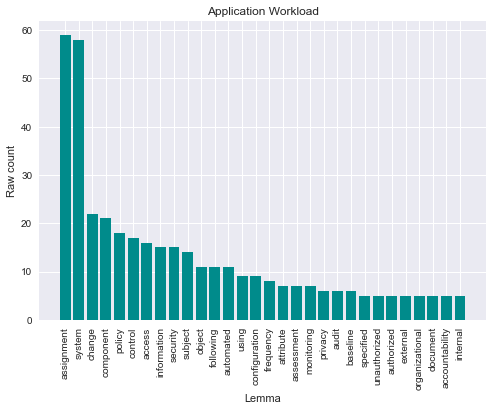

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in app_workload_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in app_workload_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts, color='darkcyan')
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Application Workload")

#### Data

In [28]:
for i in data_df['Control Text']:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<cla

In [29]:
data_df = data_df.reset_index(drop=True)


In [30]:
for i in data_df['Control Text']:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<cla

In [31]:
data_df = data_df.drop(data_df.index[28])

In [32]:
data_df['Control Text']= data_df['Control Text'].apply(lambda x: x.lower())
data_df['tokenized'] = data_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
data_df['stopwords_removed'] = data_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
data_df['porter_stemmed'] = data_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
data_df['msg_lemmatized'] = data_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
data_df['rejoined_stem'] = data_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
data_df['rejoined_lem'] = data_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [57]:
with open('data_text.txt', 'w') as f:
    f.write(data_df['rejoined_lem'].str.cat())

In [60]:
data_text = open('data_text.txt', encoding="utf8").read()
parsed_data_text = nlp(data_text)

data_histogram = Counter()
for token in parsed_data_text:
    original_token_text = token.orth_
    data_histogram[original_token_text] += 1

del data_histogram['b']
del data_histogram['one']

data_sorted_token_count_pairs = sorted(data_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in data_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 82
information : 78
security : 54
system : 46
attribute : 28
access : 26
privacy : 24
control : 22
policy : 21
subject : 20
domain : 16
data : 16
different : 16
object : 15
individual : 15
following : 14
selection : 14
cryptographic : 14
mechanism : 13
change : 12
content : 12
device : 11
type : 10
flow : 9
using : 9
filtering : 9
classified : 9
agreement : 9
key : 9
associated : 8
audit : 8
mobile : 8
assessment : 8
authorization : 7
use : 7
filter : 7
accordance : 7
service : 7
process : 7
unclassified : 7
official : 7
user : 7
monitoring : 7
specified : 6
component : 6
value : 6
c : 6
processing : 6
implement : 6
protected : 5
authorized : 5
technology : 5
storing : 5
transmitting : 5
accountability : 5
organizational : 5
frequency : 5
exchange : 5
enforce : 4
granted : 4
unauthorized : 4
privilege : 4
consistent : 4
malicious : 4
capability : 4
associate : 4
association : 4
permitted : 4
review : 4
integrity : 4
personnel : 4
protect : 4
sharing : 4
automated : 4
manag

Text(0.5, 1.0, 'Data')

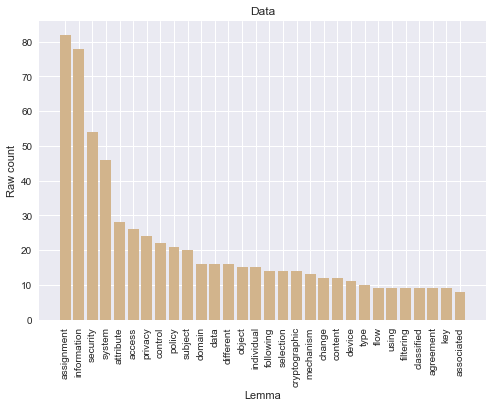

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in data_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in data_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts, color='tan')
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Data")

### Topic Modeling

Each document is part of multiple topics. Each topic consists of a bunch of regularly co-occurring words. 

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=5, suppress=True)

#### Identity

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(list(identity_df['rejoined_lem']))


In [83]:
tf.shape 

(107, 590)

In [90]:
# fit an LDA model to the data
num_topics = 3

from sklearn.decomposition import LatentDirichletAllocation

# n_components: number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# lda.fit accepts a sparse matrix tf
lda.fit(tf)

LatentDirichletAllocation(n_components=3, random_state=0)

In [91]:
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
assignment : 0.04156813008183121
system : 0.03730671534735325
access : 0.03067704418359911
information : 0.030115879632092096
individual : 0.02122184999955819
processing : 0.017955422420443783
subject : 0.015913608325463943
identifiable : 0.013833442493358076
personally : 0.01383344249335747
policy : 0.013778607852698481
object : 0.012797889001508852
security : 0.010566024392488176
change : 0.010446983726181672
external : 0.009683879802204937
verify : 0.009566325773991137
attribute : 0.009393067873890892
service : 0.009386556712912851
control : 0.009282657664327721
frequency : 0.008422589765392672
organizational : 0.007295744147638365

[Topic 1]
assignment : 0.049582913765684994
account : 0.03033869464979267
individual : 0.02558815587721193
system : 0.024896762444266154
access : 0.023689384814222225
authenticator : 0.018550327969084048
role : 0.017079420955124377
user : 0.012833693418762952
aut

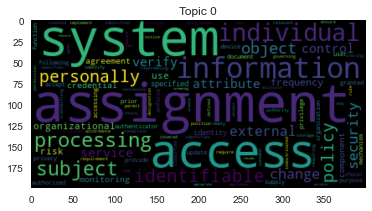

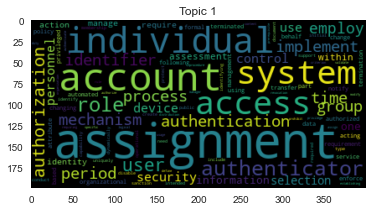

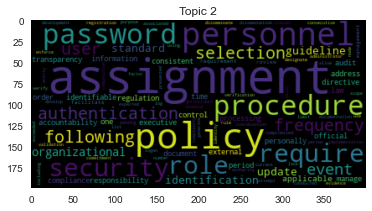

In [92]:
from wordcloud import WordCloud

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(None)

In [86]:
def compute_average_num_unique_words(topic_word_distributions, num_top_words, vectorizer, verbose=True):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    average_number_of_unique_top_words = 0
    for topic_idx1 in range(num_topics):
        if verbose:
            print('[Topic ', topic_idx1, ']', sep='')
        
        sort_indices1 = np.argsort(topic_word_distributions[topic_idx1])[::-1]
        num_unique_top_words = 0
        for top_word_idx1 in sort_indices1[:num_top_words]:
            word1 = vocab[top_word_idx1]
            break_ = False
            for topic_idx2 in range(num_topics):
                if topic_idx1 != topic_idx2:
                    sort_indices2 = np.argsort(topic_word_distributions[topic_idx2])[::-1]
                    for top_word_idx2 in sort_indices2[:num_top_words]:
                        word2 = vocab[top_word_idx2]
                        if word1 == word2:
                            break_ = True
                            break
                    if break_:
                        break
            else:
                num_unique_top_words += 1
        if verbose:
            print('Number of unique top words:', num_unique_top_words)
            print()

        average_number_of_unique_top_words += num_unique_top_words
    average_number_of_unique_top_words /= num_topics
    
    if verbose:
        print('Average number of unique top words:', average_number_of_unique_top_words)
    
    return average_number_of_unique_top_words

In [87]:
def log_prob_see_word1_given_see_word2(word1, word2, vectorizer, eps=0.1):
    word1_column_idx = vectorizer.vocabulary_[word1]
    word2_column_idx = vectorizer.vocabulary_[word2]
    documents_with_word1 = (tf[:, word1_column_idx].toarray().flatten() > 0)
    documents_with_word2 = (tf[:, word2_column_idx].toarray().flatten() > 0)
    documents_with_both_word1_and_word2 = documents_with_word1 * documents_with_word2
    return np.log2((documents_with_both_word1_and_word2.sum() + eps) / documents_with_word2.sum())

In [88]:
def compute_average_coherence(topic_word_distributions, num_top_words, vectorizer, verbose=True):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    average_coherence = 0
    for topic_idx in range(num_topics):
        if verbose:
            print('[Topic ', topic_idx, ']', sep='')
        
        sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
        coherence = 0.
        for top_word_idx1 in sort_indices[:num_top_words]:
            word1 = vocab[top_word_idx1]
            for top_word_idx2 in sort_indices[:num_top_words]:
                word2 = vocab[top_word_idx2]
                if top_word_idx1 != top_word_idx2:
                    coherence += log_prob_see_word1_given_see_word2(word1, word2, vectorizer, 0.1)
        
        if verbose:
            print('Coherence:', coherence)
            print()
        average_coherence += coherence
    average_coherence /= num_topics
    if verbose:
        print('Average coherence:', average_coherence)
    return average_coherence

In [89]:
k_values = range(2, 11)
avg_coherences = []
avg_num_unique_words = []

for k in k_values:
    lda_candidate = LatentDirichletAllocation(n_components=k, random_state=0)
    lda_candidate.fit(tf)
    topic_word_distributions = np.array([row / row.sum() for row in lda_candidate.components_])
    print('-' * 80)
    print('Number of topics:', k)
    print()
    print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)
    print()
    print()
    
    avg_coherences.append(compute_average_coherence(topic_word_distributions, num_top_words, tf_vectorizer, False))
    avg_num_unique_words.append(compute_average_num_unique_words(topic_word_distributions, num_top_words, tf_vectorizer, False))

--------------------------------------------------------------------------------
Number of topics: 2

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
assignment : 0.0402083938641105
system : 0.031023976029201893
information : 0.023910202705344833
authenticator : 0.019501917621343855
processing : 0.018110587583018287
individual : 0.016538834415445024
identifiable : 0.014870226696120233
personally : 0.014868577850143868
access : 0.014125382382840761
subject : 0.01256484758213934
policy : 0.011128853081406596
control : 0.010259827543184906
object : 0.010128133361112637
use : 0.009644934662332603
change : 0.009231796204575957
service : 0.008287444752252458
external : 0.00814419447411406
attribute : 0.0075530767349794815
identity : 0.007413526838085362
security : 0.006614708948232966

[Topic 1]
assignment : 0.05294820100800089
access : 0.02336726983141905
account : 0.020183914796324323
role : 0.01757507253487605
individual : 0.01732723951202397
s

Text(0, 0.5, 'Average coherence')

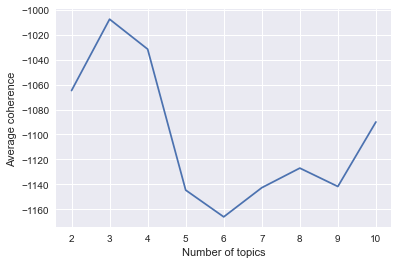

In [43]:
plt.plot(k_values, avg_coherences)
plt.xlabel('Number of topics')
plt.ylabel('Average coherence')

#### Device

In [94]:
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(list(device_df['rejoined_lem']))

In [96]:
tf.shape 

(72, 464)

In [46]:
k_values = range(2, 20)
avg_coherences = []
avg_num_unique_words = []

for k in k_values:
    lda_candidate = LatentDirichletAllocation(n_components=k, random_state=0)
    lda_candidate.fit(tf)
    topic_word_distributions = np.array([row / row.sum() for row in lda_candidate.components_])
    print('-' * 80)
    print('Number of topics:', k)
    print()
    print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)
    print()
    print()
    
    avg_coherences.append(compute_average_coherence(topic_word_distributions, num_top_words, tf_vectorizer, False))
    avg_num_unique_words.append(compute_average_num_unique_words(topic_word_distributions, num_top_words, tf_vectorizer, False))

--------------------------------------------------------------------------------
Number of topics: 2

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
assignment : 0.053692450142405555
system : 0.03034968814728574
access : 0.024156690306787583
mechanism : 0.01984995819628624
change : 0.019088515229601147
physical : 0.013910117370357156
using : 0.013762938660000008
configuration : 0.013561578727781291
automated : 0.012647087269010775
remote : 0.010891198216100729
component : 0.010822384770202828
provide : 0.010473045416147698
implement : 0.00946216153344968
authentication : 0.009406397761843582
monitor : 0.009207681750855236
use : 0.008617689053178392
control : 0.008515406447801202
number : 0.008092714571842326
response : 0.00808110773676579
attempt : 0.006617482882009883

[Topic 1]
assignment : 0.040792892532304184
system : 0.040650326330707295
device : 0.028145999329542325
policy : 0.017759065468487163
subject : 0.014983228404577211
informat

Text(0, 0.5, 'Average coherence')

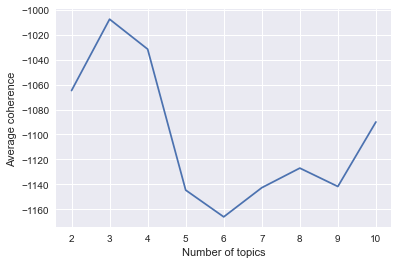

In [97]:
plt.plot(k_values, avg_coherences)
plt.xlabel('Number of topics')
plt.ylabel('Average coherence')

In [99]:
# fit an LDA model to the data
num_topics = 3

from sklearn.decomposition import LatentDirichletAllocation

# n_components: number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# lda.fit accepts a sparse matrix tf
lda.fit(tf)

LatentDirichletAllocation(n_components=3, random_state=0)

In [100]:
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
assignment : 0.042735041999140036
access : 0.031809084001985524
mechanism : 0.021592911401887356
system : 0.018828500970096928
remote : 0.017925595896268715
physical : 0.01620655816606191
control : 0.015893169938496158
provide : 0.014458634152151498
authentication : 0.01440676936992704
component : 0.013756157230319283
number : 0.013724732804747288
monitor : 0.011416404236234393
using : 0.011208598785327767
attempt : 0.01114849046244251
logon : 0.011148490461900662
factor : 0.011063153207048966
implement : 0.01011660300621207
use : 0.009565807714168104
automated : 0.00860264845760729
consecutive : 0.008571031148118302

[Topic 1]
system : 0.045436921294606455
assignment : 0.03718364310242627
subject : 0.02298534214535979
device : 0.019684483056376788
access : 0.019471239897457485
object : 0.018145995441472475
policy : 0.018102376216698496
component : 0.016710755392062272
control : 0.0152364535149

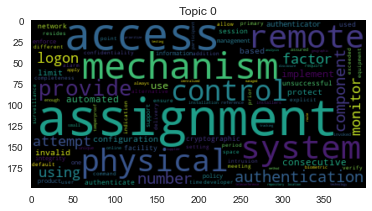

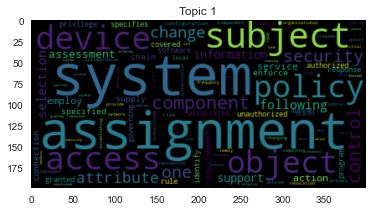

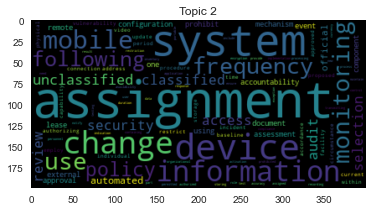

In [101]:
from wordcloud import WordCloud

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(None)

### Network/Environment

In [103]:
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(list(net_env_df['rejoined_lem']))

In [104]:
k_values = range(2, 20)
avg_coherences = []
avg_num_unique_words = []

for k in k_values:
    lda_candidate = LatentDirichletAllocation(n_components=k, random_state=0)
    lda_candidate.fit(tf)
    topic_word_distributions = np.array([row / row.sum() for row in lda_candidate.components_])
    print('-' * 80)
    print('Number of topics:', k)
    print()
    print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)
    print()
    print()
    
    avg_coherences.append(compute_average_coherence(topic_word_distributions, num_top_words, tf_vectorizer, False))
    avg_num_unique_words.append(compute_average_num_unique_words(topic_word_distributions, num_top_words, tf_vectorizer, False))

--------------------------------------------------------------------------------
Number of topics: 2

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
assignment : 0.04040178796646632
system : 0.030320515583846432
information : 0.026619284116784356
device : 0.01586219412885491
policy : 0.01575995230664632
control : 0.014901948348001808
security : 0.013218836506480553
access : 0.010719311616851612
implement : 0.01017427049783925
network : 0.01007961445998552
subject : 0.009351626111025583
mechanism : 0.008965909233136766
use : 0.008789291039620463
external : 0.008781836639663192
following : 0.007985813839265166
prevent : 0.00796966735520615
interface : 0.007533195694304029
official : 0.006938217855350727
object : 0.006938186924638434
attribute : 0.006936394593026763

[Topic 1]
assignment : 0.05362466840226213
system : 0.05254726708381525
component : 0.024180186121331305
following : 0.011645044564649201
employ : 0.011011537699056773
control : 0

Text(0, 0.5, 'Average coherence')

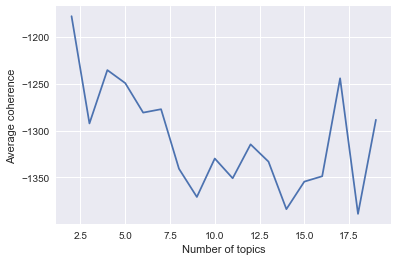

In [105]:
plt.plot(k_values, avg_coherences)
plt.xlabel('Number of topics')
plt.ylabel('Average coherence')

In [107]:
# fit an LDA model to the data
num_topics = 2

from sklearn.decomposition import LatentDirichletAllocation

# n_components: number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# lda.fit accepts a sparse matrix tf
lda.fit(tf)

LatentDirichletAllocation(n_components=2, random_state=0)

In [108]:
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
assignment : 0.04040178796646632
system : 0.030320515583846432
information : 0.026619284116784356
device : 0.01586219412885491
policy : 0.01575995230664632
control : 0.014901948348001808
security : 0.013218836506480553
access : 0.010719311616851612
implement : 0.01017427049783925
network : 0.01007961445998552
subject : 0.009351626111025583
mechanism : 0.008965909233136766
use : 0.008789291039620463
external : 0.008781836639663192
following : 0.007985813839265166
prevent : 0.00796966735520615
interface : 0.007533195694304029
official : 0.006938217855350727
object : 0.006938186924638434
attribute : 0.006936394593026763

[Topic 1]
assignment : 0.05362466840226213
system : 0.05254726708381525
component : 0.024180186121331305
following : 0.011645044564649201
employ : 0.011011537699056773
control : 0.010957146659926784
selection : 0.010117825024782154
monitoring : 0.010097081208816125
change : 0.0099

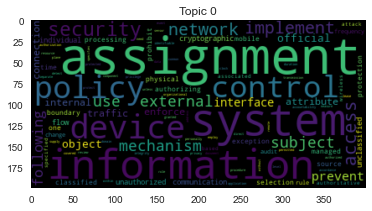

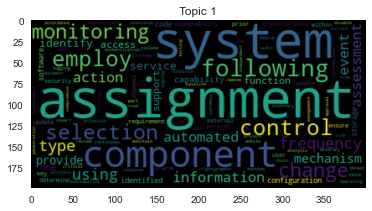

In [109]:
from wordcloud import WordCloud

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(None)

### Application Workload

In [111]:
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(list(app_workload_df['rejoined_lem']))

In [112]:
k_values = range(2, 20)
avg_coherences = []
avg_num_unique_words = []

for k in k_values:
    lda_candidate = LatentDirichletAllocation(n_components=k, random_state=0)
    lda_candidate.fit(tf)
    topic_word_distributions = np.array([row / row.sum() for row in lda_candidate.components_])
    print('-' * 80)
    print('Number of topics:', k)
    print()
    print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)
    print()
    print()
    
    avg_coherences.append(compute_average_coherence(topic_word_distributions, num_top_words, tf_vectorizer, False))
    avg_num_unique_words.append(compute_average_num_unique_words(topic_word_distributions, num_top_words, tf_vectorizer, False))

--------------------------------------------------------------------------------
Number of topics: 2

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
system : 0.053103361800190936
assignment : 0.0311977059018844
change : 0.02041888508873873
assessment : 0.017120669064399418
monitoring : 0.015433923608200966
component : 0.014407656886254243
service : 0.013350491389216143
control : 0.01124474799915458
security : 0.010341021719429837
approval : 0.01008786429637276
code : 0.010087751287918084
external : 0.009612806966812505
use : 0.00864731435139234
source : 0.008253368963482931
provide : 0.008215733200347028
privacy : 0.007334185800065922
ensure : 0.006762007274156507
employ : 0.006670804800890637
approved : 0.006521821714639519
personnel : 0.006423221335386461

[Topic 1]
assignment : 0.053463547732695633
system : 0.04016619654350285
policy : 0.02244082031968388
information : 0.020663127050477122
access : 0.01775952074031126
subject : 0.0176205

Text(0, 0.5, 'Average coherence')

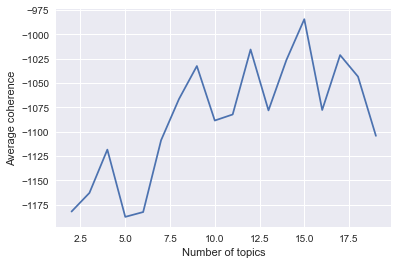

In [113]:
plt.plot(k_values, avg_coherences)
plt.xlabel('Number of topics')
plt.ylabel('Average coherence')

In [114]:
# fit an LDA model to the data
num_topics = 3

from sklearn.decomposition import LatentDirichletAllocation

# n_components: number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# lda.fit accepts a sparse matrix tf
lda.fit(tf)

LatentDirichletAllocation(n_components=3, random_state=0)

In [115]:
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
system : 0.038681496998791635
assignment : 0.02249271645582294
service : 0.01808796731906811
component : 0.018071124000925004
authenticator : 0.013827399780228823
software : 0.010824909803522286
control : 0.010778769596522844
employ : 0.009860112080941265
action : 0.009773519426981991
storage : 0.009762895707425256
provide : 0.009748570480351533
following : 0.009705868136648635
require : 0.00967896588502796
implemented : 0.009678906719846168
operating : 0.009678906719846168
static : 0.009678774082641301
change : 0.009630491271172182
installation : 0.009548685185992667
access : 0.006077577676411747
policy : 0.005789407037037

[Topic 1]
assignment : 0.0544141699789962
system : 0.039654199358720096
information : 0.02368445822679979
subject : 0.02358153536511912
access : 0.021826447247064815
object : 0.018644318715032946
policy : 0.018522376233599952
control : 0.016611237166618754
security : 0.0153

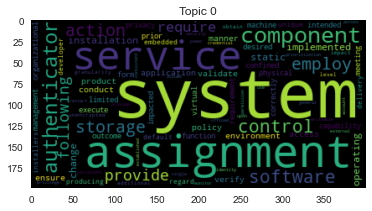

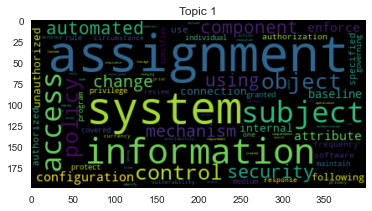

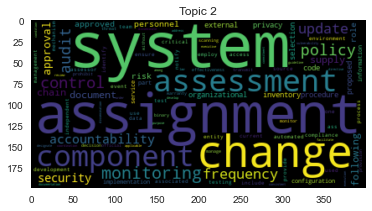

In [116]:
from wordcloud import WordCloud

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(None)

### Data

In [117]:
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(list(data_df['rejoined_lem']))

In [118]:
k_values = range(2, 20)
avg_coherences = []
avg_num_unique_words = []

for k in k_values:
    lda_candidate = LatentDirichletAllocation(n_components=k, random_state=0)
    lda_candidate.fit(tf)
    topic_word_distributions = np.array([row / row.sum() for row in lda_candidate.components_])
    print('-' * 80)
    print('Number of topics:', k)
    print()
    print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)
    print()
    print()
    
    avg_coherences.append(compute_average_coherence(topic_word_distributions, num_top_words, tf_vectorizer, False))
    avg_num_unique_words.append(compute_average_num_unique_words(topic_word_distributions, num_top_words, tf_vectorizer, False))

--------------------------------------------------------------------------------
Number of topics: 2

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
assignment : 0.04613039217911538
information : 0.045074990835841974
security : 0.02644569682777385
access : 0.015840087638250715
domain : 0.014880655828813484
system : 0.014561620424334282
data : 0.01406254714032524
different : 0.013268243426717568
mechanism : 0.013207634988738387
attribute : 0.012696265262409296
transferring : 0.012467020730498957
control : 0.012407049701409873
policy : 0.011790918770534406
implement : 0.010752248870974687
content : 0.010207278752057913
privacy : 0.009551140475052797
type : 0.008514978155575934
assessment : 0.0076577416462095035
following : 0.007654666757492242
filtering : 0.007648797120955519

[Topic 1]
system : 0.03176904882143231
information : 0.027769848290040464
assignment : 0.026423122558394057
security : 0.0227699120915996
subject : 0.021042724991442205

Text(0, 0.5, 'Average coherence')

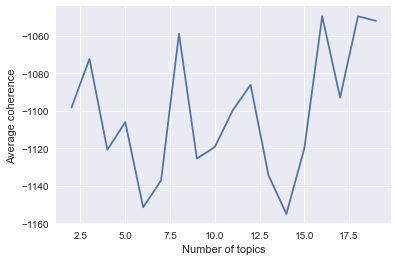

In [119]:
plt.plot(k_values, avg_coherences)
plt.xlabel('Number of topics')
plt.ylabel('Average coherence')

In [120]:
# fit an LDA model to the data
num_topics = 3

from sklearn.decomposition import LatentDirichletAllocation

# n_components: number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# lda.fit accepts a sparse matrix tf
lda.fit(tf)

LatentDirichletAllocation(n_components=3, random_state=0)

In [121]:
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
information : 0.04803983927616796
assignment : 0.03326189220251461
security : 0.025991463854101022
domain : 0.02468016647284979
different : 0.02291101192327973
transferring : 0.021498645946920816
data : 0.018257924468072013
content : 0.01712939479427788
policy : 0.016318702674310404
access : 0.013491401615356412
filtering : 0.013106712745884373
action : 0.011678368155409555
type : 0.011646156759777933
implement : 0.011194290969275175
mechanism : 0.010873428016429836
filter : 0.01029972027058812
audit : 0.010269205441450976
cryptographic : 0.00981719733269981
monitoring : 0.008832029802549874
use : 0.007623774937814242

[Topic 1]
information : 0.03858530477518484
subject : 0.026374392173071918
policy : 0.0254021908027372
assignment : 0.023578136959525015
system : 0.023061790486626054
control : 0.020305078670066524
object : 0.019678384825433295
access : 0.019650276419388737
device : 0.01706296801

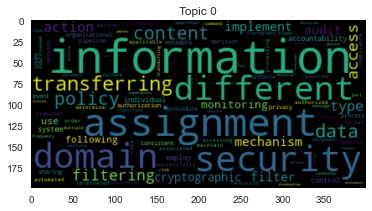

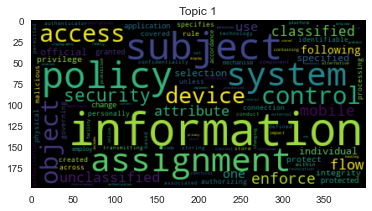

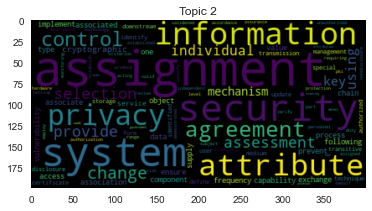

In [122]:
from wordcloud import WordCloud

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(None)

### Group by ZT Control Maturity Rating

In [125]:
traditional_df = data.loc[data['ZT Control Maturity Rating'] == 'Traditional'][["Control Text"]] 
advanced_df = data.loc[data['ZT Control Maturity Rating'] == 'Advanced'][["Control Text"]] 
optimal_df = data.loc[data['ZT Control Maturity Rating'] == 'Optimal'][["Control Text"]] 

#### Traditional

In [129]:
traditional_df['Control Text']= traditional_df['Control Text'].apply(lambda x: x.lower())
traditional_df['tokenized'] = traditional_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
traditional_df['stopwords_removed'] = traditional_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
traditional_df['porter_stemmed'] = traditional_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
traditional_df['msg_lemmatized'] = traditional_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
traditional_df['rejoined_stem'] = traditional_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
traditional_df['rejoined_lem'] = traditional_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [130]:
with open('traditional_text.txt', 'w') as f:
    f.write(traditional_df['rejoined_lem'].str.cat())

In [136]:
traditional_text = open('traditional_text.txt', encoding="utf8").read()
parsed_traditional_text = nlp(traditional_text)

traditional_histogram = Counter()
for token in parsed_traditional_text:
    original_token_text = token.orth_
    traditional_histogram[original_token_text] += 1

del traditional_histogram['b']
del traditional_histogram['one']

traditional_sorted_token_count_pairs = sorted(traditional_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))

Text(0.5, 1.0, 'Traditional')

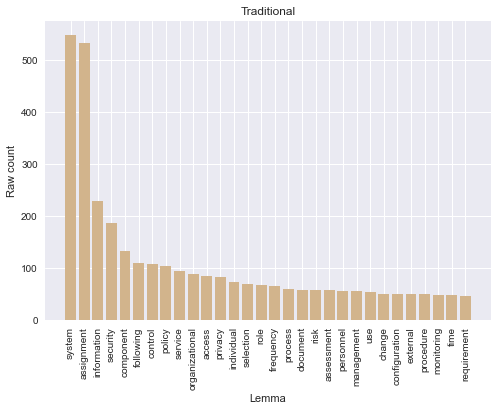

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in traditional_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in traditional_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts, color='tan')
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Traditional")

In [148]:
traditional_sorted_token_count_pairs

[('system', 548),
 ('assignment', 533),
 ('information', 228),
 ('security', 187),
 ('component', 132),
 ('following', 110),
 ('control', 107),
 ('policy', 104),
 ('service', 94),
 ('organizational', 89),
 ('access', 85),
 ('privacy', 83),
 ('individual', 72),
 ('selection', 69),
 ('role', 67),
 ('frequency', 65),
 ('process', 59),
 ('document', 58),
 ('risk', 58),
 ('assessment', 58),
 ('personnel', 56),
 ('management', 55),
 ('use', 54),
 ('change', 50),
 ('configuration', 50),
 ('external', 50),
 ('procedure', 49),
 ('monitoring', 48),
 ('time', 47),
 ('requirement', 46),
 ('within', 44),
 ('user', 44),
 ('software', 44),
 ('mechanism', 43),
 ('design', 43),
 ('review', 42),
 ('event', 40),
 ('update', 38),
 ('type', 38),
 ('development', 37),
 ('function', 36),
 ('identifiable', 35),
 ('device', 35),
 ('personally', 34),
 ('processing', 34),
 ('developer', 34),
 ('principle', 34),
 ('organization', 33),
 ('associated', 31),
 ('audit', 31),
 ('componentimplement', 31),
 ('accordance

#### Advanced

In [137]:
advanced_df['Control Text']= advanced_df['Control Text'].apply(lambda x: x.lower())
advanced_df['tokenized'] = advanced_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
advanced_df['stopwords_removed'] = advanced_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
advanced_df['porter_stemmed'] = advanced_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
advanced_df['msg_lemmatized'] = advanced_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
advanced_df['rejoined_stem'] = advanced_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
advanced_df['rejoined_lem'] = advanced_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [138]:
with open('advanced_text.txt', 'w') as f:
    f.write(advanced_df['rejoined_lem'].str.cat())

In [143]:
advanced_text = open('advanced_text.txt', encoding="utf8").read()
parsed_advanced_text = nlp(advanced_text)

advanced_histogram = Counter()
for token in parsed_advanced_text:
    original_token_text = token.orth_
    advanced_histogram[original_token_text] += 1

del advanced_histogram['b']
del advanced_histogram['one']

advanced_sorted_token_count_pairs = sorted(advanced_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))

Text(0.5, 1.0, 'Advanced')

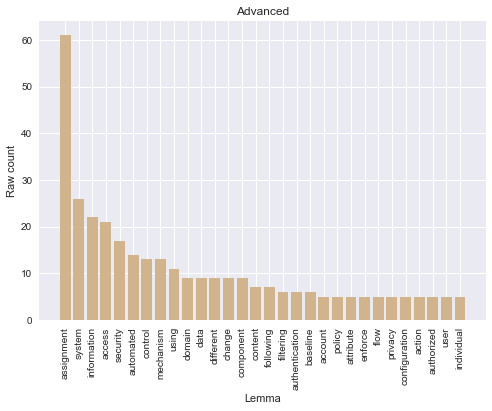

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in advanced_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in advanced_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts, color='tan')
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Advanced")

In [147]:
advanced_sorted_token_count_pairs

[('assignment', 61),
 ('system', 26),
 ('information', 22),
 ('access', 21),
 ('security', 17),
 ('automated', 14),
 ('control', 13),
 ('mechanism', 13),
 ('using', 11),
 ('domain', 9),
 ('data', 9),
 ('different', 9),
 ('change', 9),
 ('component', 9),
 ('content', 7),
 ('following', 7),
 ('filtering', 6),
 ('authentication', 6),
 ('baseline', 6),
 ('account', 5),
 ('policy', 5),
 ('attribute', 5),
 ('enforce', 5),
 ('flow', 5),
 ('privacy', 5),
 ('configuration', 5),
 ('action', 5),
 ('authorized', 5),
 ('user', 5),
 ('individual', 5),
 ('selection', 4),
 ('type', 4),
 ('implement', 4),
 ('organizational', 4),
 ('network', 4),
 ('personnel', 4),
 ('external', 4),
 ('notify', 4),
 ('automatically', 3),
 ('disable', 3),
 ('time', 3),
 ('audit', 3),
 ('subject', 3),
 ('based', 3),
 ('within', 3),
 ('approved', 3),
 ('malicious', 3),
 ('accordance', 3),
 ('document', 3),
 ('device', 3),
 ('technique', 3),
 ('number', 3),
 ('consecutive', 3),
 ('logon', 3),
 ('use', 3),
 ('factor', 3),
 (